In [48]:
import pandas as pd
import matplotlib.pyplot as plt
Z = 1.96


In [49]:
path = "../../../Risultati/Air_Quality/knn_regression.csv"
df = pd.read_csv(path)
df.reset_index(drop=True)
df['percentage'] = 100 - df['percentage']
df

,percentage,outlier,imputation,r2
0,100,none,none,0.733908
1,90,none,none,0.669394
2,90,z,drop,0.669762
3,90,z,LOCF,0.669516
4,90,z,mean,0.651149
...,...,...,...,...
675,50,iforest,interpolation,0.501337
676,50,hst,drop,0.541700
677,50,hst,LOCF,0.543207
678,50,hst,mean,0.130880


In [50]:
df_neg = df[df['r2']<0]
df_neg

,percentage,outlier,imputation,r2
12,90,iforest,mean,-0.214140
29,90,iforest,mean,-0.219821
46,90,iforest,mean,-0.243043
63,90,iforest,mean,-0.218550
80,90,iforest,mean,-0.217751
97,90,iforest,mean,-0.203174
114,90,iforest,mean,-0.217225
131,90,iforest,mean,-0.199076
148,80,iforest,mean,-0.204025
165,80,iforest,mean,-0.237365


In [51]:
df.loc[df['r2'] < 0, 'r2'] = 0

In [52]:
df

,percentage,outlier,imputation,r2
0,100,none,none,0.733908
1,90,none,none,0.669394
2,90,z,drop,0.669762
3,90,z,LOCF,0.669516
4,90,z,mean,0.651149
...,...,...,...,...
675,50,iforest,interpolation,0.501337
676,50,hst,drop,0.541700
677,50,hst,LOCF,0.543207
678,50,hst,mean,0.130880


In [53]:
df_grouped = df.groupby(['outlier','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_grouped)

                       percentage        r2
outlier imputation                         
iforest drop            70.000000  0.664916
lof     drop            70.000000  0.647128
        LOCF            70.000000  0.630453
        interpolation   70.000000  0.624206
hst     drop            70.000000  0.620151
        LOCF            70.000000  0.613938
        interpolation   70.256410  0.608378
z       drop            70.000000  0.529984
none    none            70.731707  0.527773
z       LOCF            70.000000  0.527074
        interpolation   70.000000  0.526970
        mean            70.000000  0.514482
iforest LOCF            70.000000  0.475282
        interpolation   70.000000  0.405670
hst     mean            70.000000  0.403481
lof     mean            70.000000  0.397921
iforest mean            70.000000  0.000000


In [54]:
top_performance = df[df['percentage']==100]['r2'].mean()
top_performance

0.7339076068391072

In [55]:
df['percent_diff'] = (((df['r2'] - top_performance) / top_performance) * 100).round(2)
df

,percentage,outlier,imputation,r2,percent_diff
0,100,none,none,0.733908,0.00
1,90,none,none,0.669394,-8.79
2,90,z,drop,0.669762,-8.74
3,90,z,LOCF,0.669516,-8.77
4,90,z,mean,0.651149,-11.28
...,...,...,...,...,...
675,50,iforest,interpolation,0.501337,-31.69
676,50,hst,drop,0.541700,-26.19
677,50,hst,LOCF,0.543207,-25.98
678,50,hst,mean,0.130880,-82.17


In [56]:
tabella = df.groupby(['outlier','imputation','percentage']).mean()
tabella['r2'] = tabella['r2'].round(4)
tabella['percent_diff'] = tabella['percent_diff'].round(2)
tabella.sort_values(by=['outlier','imputation'],ascending=False).to_csv("4_r.csv")
tabella = tabella.reset_index()
tabella = tabella.pivot(index=['outlier','imputation'],columns='percentage',values='percent_diff').reset_index().sort_values(by=[100,90,80,70],ascending=False)
tabella.to_csv("4_r_n.csv")

In [57]:
df_none = df[(df['outlier'] == 'none') & (df['imputation']=='none')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_none['CI_Min'] = df_none['mean'] - Z * (df_none['std'] / (4 ** 0.5))
df_none['CI_Max'] = df_none['mean'] + Z * (df_none['std'] / (4 ** 0.5))

In [58]:
df_z_drop = df[(df['outlier'] == 'z') & (df['imputation']=='drop')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_drop['CI_Min'] = df_z_drop['mean'] - Z * (df_z_drop['std'] / (4 ** 0.5))
df_z_drop['CI_Max'] = df_z_drop['mean'] + Z * (df_z_drop['std'] / (4 ** 0.5))

In [59]:
df_z_locf = df[(df['outlier'] == 'z') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_locf['CI_Min'] = df_z_locf['mean'] - Z * (df_z_locf['std'] / (4 ** 0.5))
df_z_locf['CI_Max'] = df_z_locf['mean'] + Z * (df_z_locf['std'] / (4 ** 0.5))

In [60]:
df_z_mean = df[(df['outlier'] == 'z') & (df['imputation']=='mean')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_mean['CI_Min'] = df_z_mean['mean'] - Z * (df_z_mean['std'] / (4 ** 0.5))
df_z_mean['CI_Max'] = df_z_mean['mean'] + Z * (df_z_mean['std'] / (4 ** 0.5))

In [61]:
df_z_int = df[(df['outlier'] == 'z') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_int['CI_Min'] = df_z_int['mean'] - Z * (df_z_int['std'] / (4 ** 0.5))
df_z_int['CI_Max'] = df_z_int['mean'] + Z * (df_z_int['std'] / (4 ** 0.5))

In [62]:
df_lof_drop = df[(df['outlier'] == 'lof') & (df['imputation']=='drop')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_drop['CI_Min'] = df_lof_drop['mean'] - Z * (df_lof_drop['std'] / (4 ** 0.5))
df_lof_drop['CI_Max'] = df_lof_drop['mean'] + Z * (df_lof_drop['std'] / (4 ** 0.5))

In [63]:
df_lof_locf = df[(df['outlier'] == 'lof') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_locf['CI_Min'] = df_lof_locf['mean'] - Z * (df_lof_locf['std'] / (4 ** 0.5))
df_lof_locf['CI_Max'] = df_lof_locf['mean'] + Z * (df_lof_locf['std'] / (4 ** 0.5))

In [64]:
df_lof_mean = df[(df['outlier'] == 'lof') & (df['imputation']=='mean')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_mean['CI_Min'] = df_lof_mean['mean'] - Z * (df_lof_mean['std'] / (4 ** 0.5))
df_lof_mean['CI_Max'] = df_lof_mean['mean'] + Z * (df_lof_mean['std'] / (4 ** 0.5))

In [65]:
df_lof_int = df[(df['outlier'] == 'lof') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_int['CI_Min'] = df_lof_int['mean'] - Z * (df_lof_int['std'] / (4 ** 0.5))
df_lof_int['CI_Max'] = df_lof_int['mean'] + Z * (df_lof_int['std'] / (4 ** 0.5))

In [66]:
df_if_drop = df[(df['outlier'] == 'iforest') & (df['imputation']=='drop')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_if_drop['CI_Min'] = df_if_drop['mean'] - Z * (df_if_drop['std'] / (4 ** 0.5))
df_if_drop['CI_Max'] = df_if_drop['mean'] + Z * (df_if_drop['std'] / (4 ** 0.5))

In [67]:
df_if_locf = df[(df['outlier'] == 'iforest') & (df['imputation'] == 'LOCF')].groupby(['percentage'])['r2'].agg(
    ['mean', 'std']).reset_index()
df_if_locf['CI_Min'] = df_if_locf['mean'] - Z * (df_if_locf['std'] / (4 ** 0.5))
df_if_locf['CI_Max'] = df_if_locf['mean'] + Z * (df_if_locf['std'] / (4 ** 0.5))

In [68]:
df_if_mean = df[(df['outlier'] == 'iforest') & (df['imputation'] == 'mean')].groupby(['percentage'])['r2'].agg(
    ['mean', 'std']).reset_index()
df_if_mean['CI_Min'] = df_if_mean['mean'] - Z * (df_if_mean['std'] / (4 ** 0.5))
df_if_mean['CI_Max'] = df_if_mean['mean'] + Z * (df_if_mean['std'] / (4 ** 0.5))

In [69]:
df_if_int = df[(df['outlier'] == 'iforest') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_if_int['CI_Min'] = df_if_int['mean'] - Z * (df_if_int['std'] / (4 ** 0.5))
df_if_int['CI_Max'] = df_if_int['mean'] + Z * (df_if_int['std'] / (4 ** 0.5))

In [70]:
df_hst_drop = df[(df['outlier'] == 'hst') & (df['imputation']=='drop')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_drop['CI_Min'] = df_hst_drop['mean'] - Z * (df_hst_drop['std'] / (4 ** 0.5))
df_hst_drop['CI_Max'] = df_hst_drop['mean'] + Z * (df_hst_drop['std'] / (4 ** 0.5))

In [71]:
df_hst_locf = df[(df['outlier'] == 'hst') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_locf['CI_Min'] = df_hst_locf['mean'] - Z * (df_hst_locf['std'] / (4 ** 0.5))
df_hst_locf['CI_Max'] = df_hst_locf['mean'] + Z * (df_hst_locf['std'] / (4 ** 0.5))

In [72]:
df_hst_mean = df[(df['outlier'] == 'hst') & (df['imputation']=='mean')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_mean['CI_Min'] = df_hst_mean['mean'] - Z * (df_hst_mean['std'] / (4 ** 0.5))
df_hst_mean['CI_Max'] = df_hst_mean['mean'] + Z * (df_hst_mean['std'] / (4 ** 0.5))

In [73]:
df_hst_int= df[(df['outlier'] == 'hst') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_int['CI_Min'] = df_hst_int['mean'] - Z * (df_hst_int['std'] / (4 ** 0.5))
df_hst_int['CI_Max'] = df_hst_int['mean'] + Z * (df_hst_int['std'] / (4 ** 0.5))

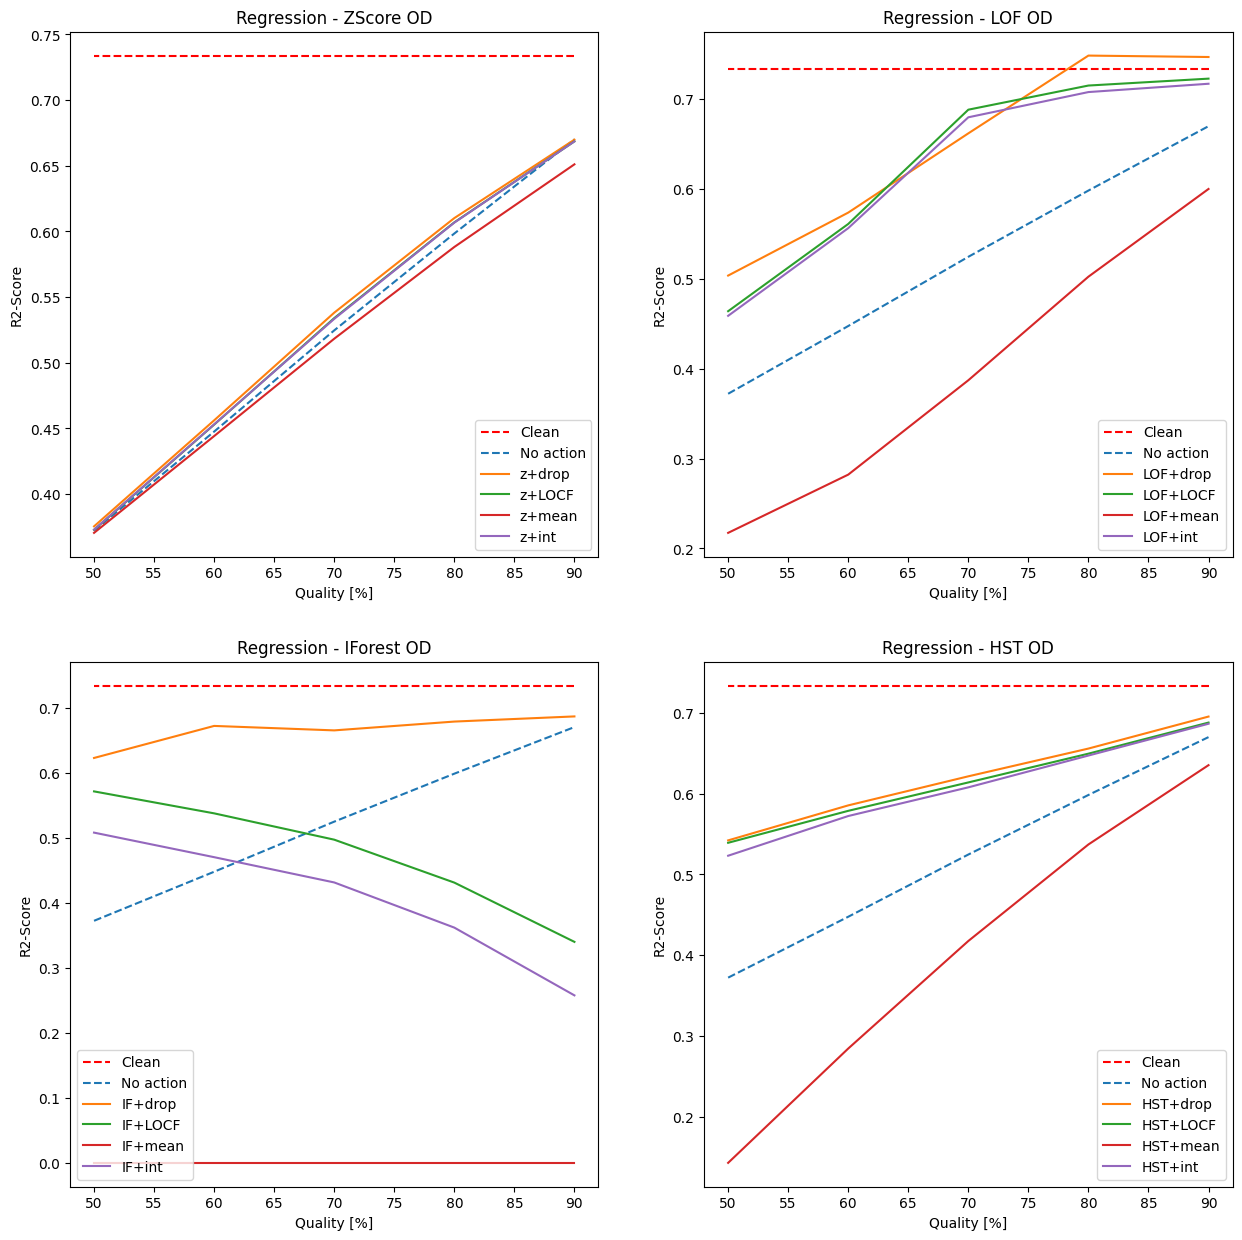

In [74]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
perc = [90,80,70,60,50]
axs[0,0].plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
axs[0,0].plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
axs[0,0].plot(df_z_drop['percentage'],df_z_drop['mean'], label='z+drop')
axs[0,0].plot(df_z_locf['percentage'],df_z_locf['mean'], label='z+LOCF')
axs[0,0].plot(df_z_mean['percentage'],df_z_mean['mean'], label='z+mean')
axs[0,0].plot(df_z_int['percentage'],df_z_int['mean'], label='z+int')
axs[0,0].set_title("Regression - ZScore OD")
axs[0,0].legend()

axs[0,1].plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
axs[0,1].plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
axs[0,1].plot(df_lof_drop['percentage'],df_lof_drop['mean'], label='LOF+drop')
axs[0,1].plot(df_lof_locf['percentage'],df_lof_locf['mean'], label='LOF+LOCF')
axs[0,1].plot(df_lof_mean['percentage'],df_lof_mean['mean'], label='LOF+mean')
axs[0,1].plot(df_lof_int['percentage'],df_lof_int['mean'], label='LOF+int')
axs[0,1].set_title("Regression - LOF OD")
axs[0,1].legend()

axs[1,0].plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
axs[1,0].plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
axs[1,0].plot(df_if_drop['percentage'],df_if_drop['mean'], label='IF+drop')
axs[1,0].plot(df_if_locf['percentage'],df_if_locf['mean'], label='IF+LOCF')
axs[1,0].plot(df_if_mean['percentage'],df_if_mean['mean'], label='IF+mean')
axs[1,0].plot(df_if_int['percentage'],df_if_int['mean'], label='IF+int')
axs[1,0].set_title("Regression - IForest OD")
axs[1,0].legend()

axs[1,1].plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
axs[1,1].plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
axs[1,1].plot(df_hst_drop['percentage'],df_hst_drop['mean'], label='HST+drop')
axs[1,1].plot(df_hst_locf['percentage'],df_hst_locf['mean'], label='HST+LOCF')
axs[1,1].plot(df_hst_mean['percentage'],df_hst_mean['mean'], label='HST+mean')
axs[1,1].plot(df_hst_int['percentage'],df_hst_int['mean'], label='HST+int')
axs[1,1].set_title("Regression - HST OD")
axs[1,1].legend()

for ax in axs.flat:
    ax.set(xlabel='Quality [%]', ylabel='R2-Score')


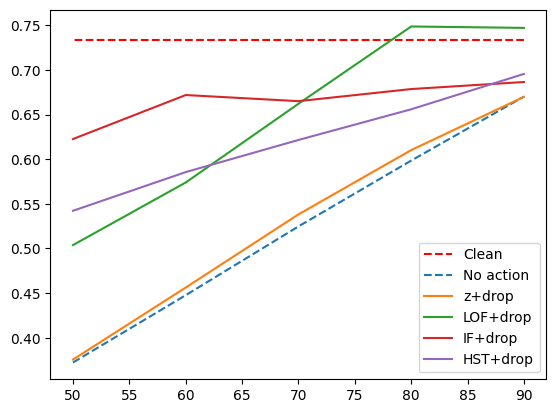

In [75]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
plt.plot(df_z_drop['percentage'],df_z_drop['mean'], label='z+drop')
plt.plot(df_lof_drop['percentage'],df_lof_drop['mean'], label='LOF+drop')
plt.plot(df_if_drop['percentage'],df_if_drop['mean'], label='IF+drop')
plt.plot(df_hst_drop['percentage'],df_hst_drop['mean'], label='HST+drop')
plt.legend()

PERCENTAGE DIFFERENCE

In [76]:
df_none = df[(df['outlier'] == 'none') & (df['imputation']=='none')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_none['CI_Min'] = df_none['mean'] - Z * (df_none['std'] / (4 ** 0.5))
df_none['CI_Max'] = df_none['mean'] + Z * (df_none['std'] / (4 ** 0.5))

In [77]:
df_z_drop = df[(df['outlier'] == 'z') & (df['imputation']=='drop')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_z_drop['CI_Min'] = df_z_drop['mean'] - Z * (df_z_drop['std'] / (4 ** 0.5))
df_z_drop['CI_Max'] = df_z_drop['mean'] + Z * (df_z_drop['std'] / (4 ** 0.5))

In [78]:
df_z_locf = df[(df['outlier'] == 'z') & (df['imputation']=='LOCF')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_z_locf['CI_Min'] = df_z_locf['mean'] - Z * (df_z_locf['std'] / (4 ** 0.5))
df_z_locf['CI_Max'] = df_z_locf['mean'] + Z * (df_z_locf['std'] / (4 ** 0.5))

In [79]:
df_z_mean = df[(df['outlier'] == 'z') & (df['imputation']=='mean')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_z_mean['CI_Min'] = df_z_mean['mean'] - Z * (df_z_mean['std'] / (4 ** 0.5))
df_z_mean['CI_Max'] = df_z_mean['mean'] + Z * (df_z_mean['std'] / (4 ** 0.5))

In [80]:
df_z_int = df[(df['outlier'] == 'z') & (df['imputation']=='interpolation')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_z_int['CI_Min'] = df_z_int['mean'] - Z * (df_z_int['std'] / (4 ** 0.5))
df_z_int['CI_Max'] = df_z_int['mean'] + Z * (df_z_int['std'] / (4 ** 0.5))

In [81]:
df_lof_drop = df[(df['outlier'] == 'lof') & (df['imputation']=='drop')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_lof_drop['CI_Min'] = df_lof_drop['mean'] - Z * (df_lof_drop['std'] / (4 ** 0.5))
df_lof_drop['CI_Max'] = df_lof_drop['mean'] + Z * (df_lof_drop['std'] / (4 ** 0.5))

In [82]:
df_lof_locf = df[(df['outlier'] == 'lof') & (df['imputation']=='LOCF')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_lof_locf['CI_Min'] = df_lof_locf['mean'] - Z * (df_lof_locf['std'] / (4 ** 0.5))
df_lof_locf['CI_Max'] = df_lof_locf['mean'] + Z * (df_lof_locf['std'] / (4 ** 0.5))

In [83]:
df_lof_mean = df[(df['outlier'] == 'lof') & (df['imputation']=='mean')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_lof_mean['CI_Min'] = df_lof_mean['mean'] - Z * (df_lof_mean['std'] / (4 ** 0.5))
df_lof_mean['CI_Max'] = df_lof_mean['mean'] + Z * (df_lof_mean['std'] / (4 ** 0.5))

In [84]:
df_lof_int = df[(df['outlier'] == 'lof') & (df['imputation']=='interpolation')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_lof_int['CI_Min'] = df_lof_int['mean'] - Z * (df_lof_int['std'] / (4 ** 0.5))
df_lof_int['CI_Max'] = df_lof_int['mean'] + Z * (df_lof_int['std'] / (4 ** 0.5))

In [85]:
df_if_drop = df[(df['outlier'] == 'iforest') & (df['imputation']=='drop')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_if_drop['CI_Min'] = df_if_drop['mean'] - Z * (df_if_drop['std'] / (4 ** 0.5))
df_if_drop['CI_Max'] = df_if_drop['mean'] + Z * (df_if_drop['std'] / (4 ** 0.5))

In [86]:
df_if_locf = df[(df['outlier'] == 'iforest') & (df['imputation'] == 'LOCF')].groupby(['percentage'])['percent_diff'].agg(
    ['mean', 'std']).reset_index()
df_if_locf['CI_Min'] = df_if_locf['mean'] - Z * (df_if_locf['std'] / (4 ** 0.5))
df_if_locf['CI_Max'] = df_if_locf['mean'] + Z * (df_if_locf['std'] / (4 ** 0.5))

In [87]:
df_if_mean = df[(df['outlier'] == 'iforest') & (df['imputation'] == 'mean')].groupby(['percentage'])['percent_diff'].agg(
    ['mean', 'std']).reset_index()
df_if_mean['CI_Min'] = df_if_mean['mean'] - Z * (df_if_mean['std'] / (4 ** 0.5))
df_if_mean['CI_Max'] = df_if_mean['mean'] + Z * (df_if_mean['std'] / (4 ** 0.5))

In [88]:
df_if_int = df[(df['outlier'] == 'iforest') & (df['imputation']=='interpolation')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_if_int['CI_Min'] = df_if_int['mean'] - Z * (df_if_int['std'] / (4 ** 0.5))
df_if_int['CI_Max'] = df_if_int['mean'] + Z * (df_if_int['std'] / (4 ** 0.5))

In [89]:
df_hst_drop = df[(df['outlier'] == 'hst') & (df['imputation']=='drop')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_hst_drop['CI_Min'] = df_hst_drop['mean'] - Z * (df_hst_drop['std'] / (4 ** 0.5))
df_hst_drop['CI_Max'] = df_hst_drop['mean'] + Z * (df_hst_drop['std'] / (4 ** 0.5))

In [90]:
df_hst_locf = df[(df['outlier'] == 'hst') & (df['imputation']=='LOCF')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_hst_locf['CI_Min'] = df_hst_locf['mean'] - Z * (df_hst_locf['std'] / (4 ** 0.5))
df_hst_locf['CI_Max'] = df_hst_locf['mean'] + Z * (df_hst_locf['std'] / (4 ** 0.5))

In [91]:
df_hst_mean = df[(df['outlier'] == 'hst') & (df['imputation']=='mean')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_hst_mean['CI_Min'] = df_hst_mean['mean'] - Z * (df_hst_mean['std'] / (4 ** 0.5))
df_hst_mean['CI_Max'] = df_hst_mean['mean'] + Z * (df_hst_mean['std'] / (4 ** 0.5))

In [92]:
df_hst_int= df[(df['outlier'] == 'hst') & (df['imputation']=='interpolation')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_hst_int['CI_Min'] = df_hst_int['mean'] - Z * (df_hst_int['std'] / (4 ** 0.5))
df_hst_int['CI_Max'] = df_hst_int['mean'] + Z * (df_hst_int['std'] / (4 ** 0.5))

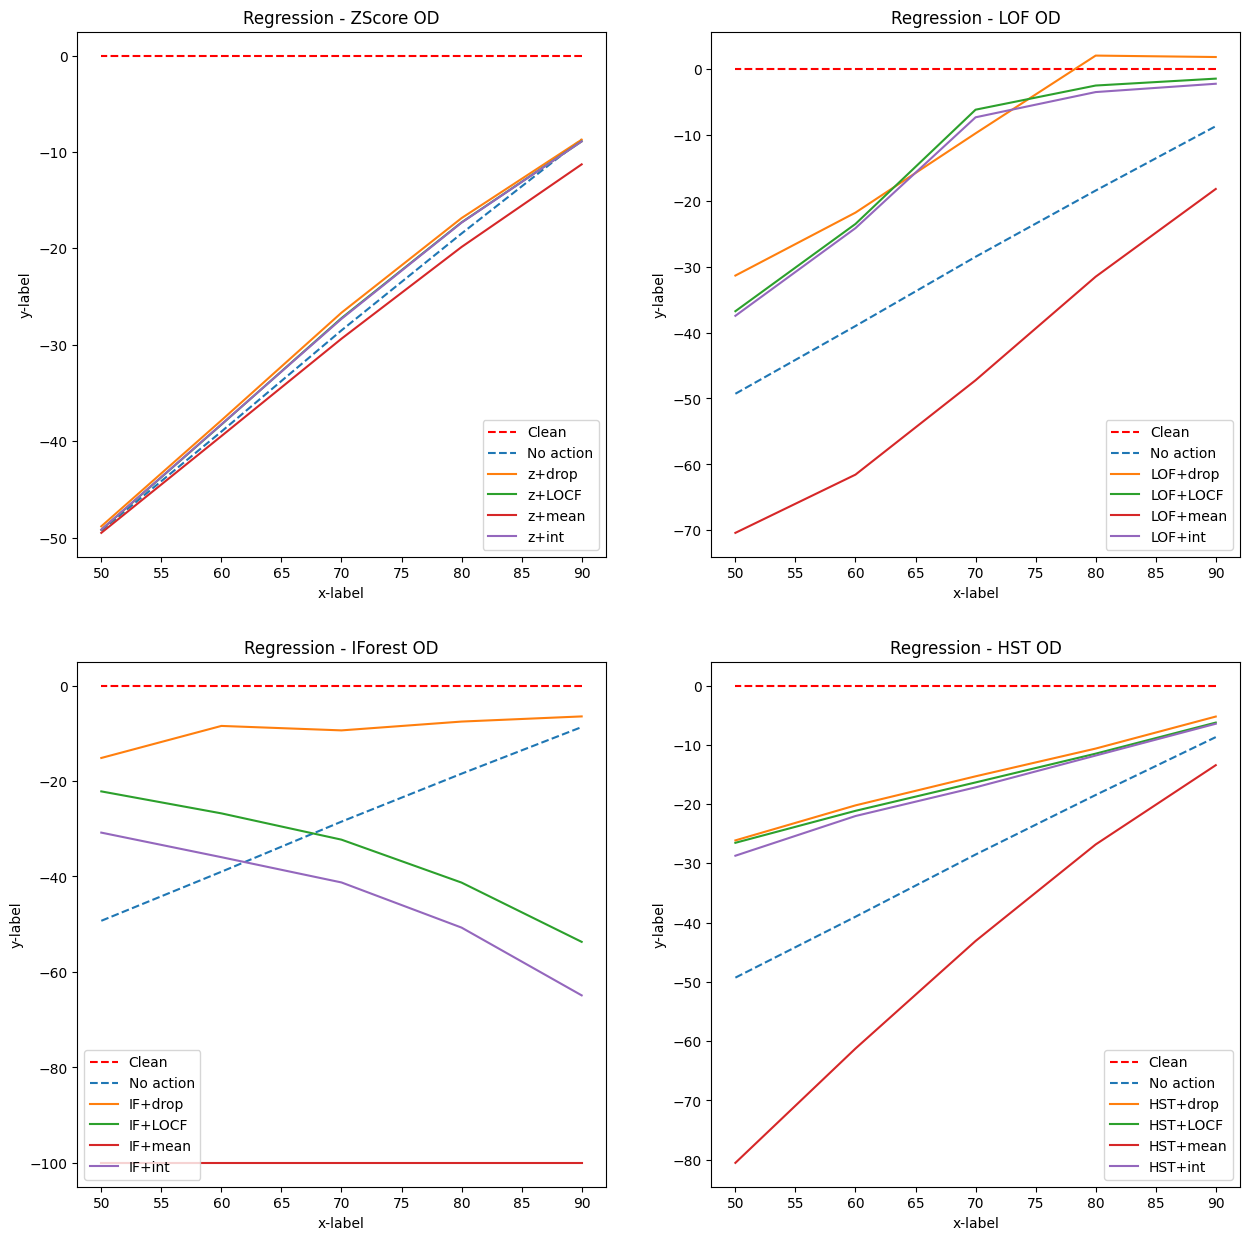

In [93]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
perc = [90,80,70,60,50]
axs[0,0].plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
axs[0,0].plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
axs[0,0].plot(df_z_drop['percentage'],df_z_drop['mean'], label='z+drop')
axs[0,0].plot(df_z_locf['percentage'],df_z_locf['mean'], label='z+LOCF')
axs[0,0].plot(df_z_mean['percentage'],df_z_mean['mean'], label='z+mean')
axs[0,0].plot(df_z_int['percentage'],df_z_int['mean'], label='z+int')
axs[0,0].set_title("Regression - ZScore OD")
axs[0,0].legend()

axs[0,1].plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
axs[0,1].plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
axs[0,1].plot(df_lof_drop['percentage'],df_lof_drop['mean'], label='LOF+drop')
axs[0,1].plot(df_lof_locf['percentage'],df_lof_locf['mean'], label='LOF+LOCF')
axs[0,1].plot(df_lof_mean['percentage'],df_lof_mean['mean'], label='LOF+mean')
axs[0,1].plot(df_lof_int['percentage'],df_lof_int['mean'], label='LOF+int')
axs[0,1].set_title("Regression - LOF OD")
axs[0,1].legend()

axs[1,0].plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
axs[1,0].plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
axs[1,0].plot(df_if_drop['percentage'],df_if_drop['mean'], label='IF+drop')
axs[1,0].plot(df_if_locf['percentage'],df_if_locf['mean'], label='IF+LOCF')
axs[1,0].plot(df_if_mean['percentage'],df_if_mean['mean'], label='IF+mean')
axs[1,0].plot(df_if_int['percentage'],df_if_int['mean'], label='IF+int')
axs[1,0].set_title("Regression - IForest OD")
axs[1,0].legend()

axs[1,1].plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
axs[1,1].plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
axs[1,1].plot(df_hst_drop['percentage'],df_hst_drop['mean'], label='HST+drop')
axs[1,1].plot(df_hst_locf['percentage'],df_hst_locf['mean'], label='HST+LOCF')
axs[1,1].plot(df_hst_mean['percentage'],df_hst_mean['mean'], label='HST+mean')
axs[1,1].plot(df_hst_int['percentage'],df_hst_int['mean'], label='HST+int')
axs[1,1].set_title("Regression - HST OD")
axs[1,1].legend()

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
